In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pprint
# Machine learning libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
# plot of decision tree.
from sklearn.tree import export_graphviz
# Convert to png.
from subprocess import call
# Display in jupyter notebook
from IPython.display import Image
# Confusion Matrix
from sklearn.metrics import confusion_matrix

### Data Mining 
### Universidad Politécnica de Yucatán
### Author: Walter Vives
### Github: [WalterVives](https://github.com/WalterVives)

## An implementation of Random Forest Algorithm to classify the digits dataset.

In [2]:
digits = load_digits()

### Description of the dataset.

In [3]:
pprint.pprint(digits.DESCR)

('.. _digits_dataset:\n'
 '\n'
 'Optical recognition of handwritten digits dataset\n'
 '--------------------------------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 5620\n'
 '    :Number of Attributes: 64\n'
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n'
 '    :Missing Attribute Values: None\n'
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n"
 '    :Date: July; 1998\n'
 '\n'
 'This is a copy of the test set of the UCI ML hand-written digits datasets\n'
 'https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n'
 '\n'
 'The data set contains images of hand-written digits: 10 classes where\n'
 'each class refers to a digit.\n'
 '\n'
 'Preprocessing programs made available by NIST were used to extract\n'
 'normalized bitmaps of handwritten digits from a preprinted form. From a\n'
 'total of 43 people, 30 contributed to the training set and different 13\n'
 'to the test

In [21]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

### Properties of the dataset.

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

we can see the "data" and the "target" in the list.

### We will use matplotlib to visualize the data.

<Figure size 432x288 with 0 Axes>

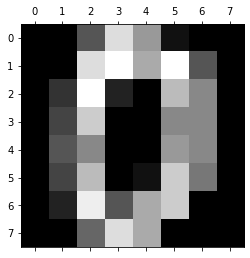

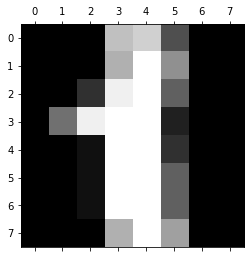

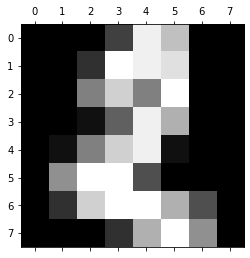

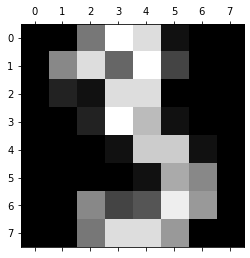

In [5]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

### First 5 registers.

In [6]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

### Creating a dataframe with the data.

In [7]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
# Shape of the dataset.
print("Total columns", df.shape[1])
print("Total rows", df.shape[0])

Total columns 64
Total rows 1797


### Target of the dataset.

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Saving the correspond target into the dataframe.

In [10]:
df["Target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Random Forest Algorithm

### Spliting the data into train set and test set.

In [11]:
# Creating 4 variables.
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Target"], axis=1), digits.target, train_size = 0.8, test_size= 0.20)

### Total of samples taken.

In [12]:
print(len(x_train)) # 80% of the data.
print(len(x_test)) # 20% of the data.

1437
360


### Calling the function RandomForestClassifier()

In [13]:
model = RandomForestClassifier() # Function from sklearn.
model.fit(x_train, y_train) # train step.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

we can see all the parameters available for Random Forest Classifier.

## Performance

In [14]:
accuracy = model.score(x_test, y_test)
print("Accuracy: ", acuracy)

Acuracy:  0.975


## Prediction

In [15]:
y_predicted = model.predict(x_test)
y_predicted

array([5, 6, 4, 1, 2, 1, 5, 5, 0, 3, 7, 2, 6, 5, 3, 8, 2, 4, 5, 8, 7, 8,
       7, 1, 8, 6, 9, 9, 8, 1, 6, 0, 0, 5, 5, 0, 1, 2, 8, 2, 5, 0, 8, 5,
       0, 0, 7, 5, 8, 0, 0, 3, 0, 5, 4, 7, 9, 5, 2, 0, 1, 6, 8, 5, 9, 0,
       6, 3, 9, 2, 0, 4, 1, 7, 0, 1, 9, 0, 5, 0, 8, 6, 8, 3, 8, 1, 3, 1,
       3, 7, 8, 1, 2, 8, 4, 6, 6, 2, 1, 6, 3, 6, 8, 3, 2, 0, 3, 0, 8, 4,
       7, 7, 7, 0, 5, 7, 6, 0, 2, 9, 8, 0, 2, 4, 3, 5, 7, 6, 2, 0, 7, 0,
       1, 6, 4, 6, 5, 9, 0, 3, 6, 4, 0, 3, 4, 1, 7, 8, 0, 8, 2, 8, 4, 8,
       1, 4, 7, 0, 2, 5, 5, 2, 2, 1, 4, 0, 6, 0, 6, 3, 1, 0, 4, 5, 6, 5,
       3, 0, 7, 4, 4, 9, 1, 1, 2, 7, 8, 9, 6, 2, 0, 7, 6, 8, 2, 4, 8, 6,
       6, 6, 1, 0, 6, 3, 5, 5, 9, 1, 4, 0, 1, 8, 7, 2, 0, 1, 3, 0, 4, 6,
       5, 9, 1, 1, 4, 4, 0, 8, 2, 0, 6, 3, 0, 0, 9, 0, 4, 5, 3, 8, 0, 6,
       2, 4, 1, 0, 2, 9, 1, 2, 5, 6, 9, 5, 5, 1, 7, 3, 2, 9, 1, 7, 6, 4,
       0, 5, 6, 3, 3, 6, 5, 1, 2, 0, 1, 4, 1, 4, 4, 0, 1, 7, 2, 4, 6, 0,
       5, 0, 4, 2, 1, 9, 9, 5, 2, 9, 9, 6, 8, 5, 1,

### Confusion Matrix

In [16]:
# To see the distribution distribution of errors and the performance.
cm = confusion_matrix(y_test, y_predicted)# fisrt the truth, second the predicted.
cm

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  2, 25]])

## Confusion Matrix Visualization

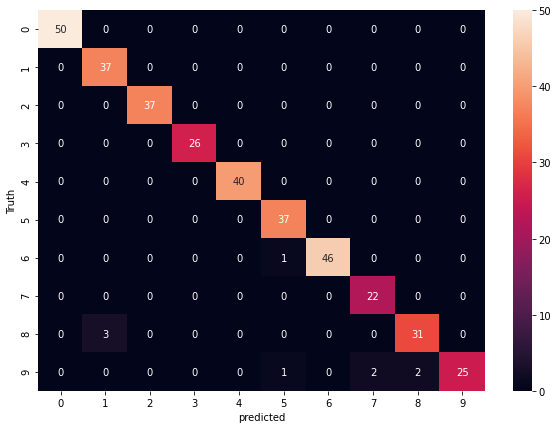

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

### Plotting process

In [18]:
# Extract single tree
estimator = model.estimators_[1]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot',
                rounded = True, proportion = True, 
                precision = 2, filled = True)

###  Convert dot to png using a system command.

In [19]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

### Visualization

In [20]:
# Display in jupyter notebook
Image(filename = 'tree.png')